<a href="https://colab.research.google.com/github/TejasBadhe07/Handwritten-Digit-Recognization/blob/main/Handwritten_Digit_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Handwritten Digit Classification using Deep Learning (Neural Network)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist 
from tensorflow.math import confusion_matrix


Loading the MNIST data from keras.dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
#shape of the numpy arrays

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60,000 Images

Test Data = 10,000 Images

Image Dimension -->28 x 28

Grayscale Image --> 1 channel

In [ ]:
#printing 10th image

print(X_train[10])

In [ ]:
print(X_train[10].shape)

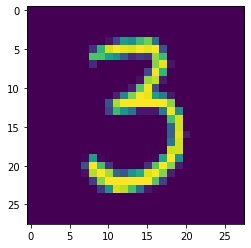

3


In [8]:
# Displaying the image

plt.imshow(X_train[50])
plt.show()

# print the corresponding label

print(Y_train[50])



Image Lables

In [9]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
# unique values in Y_train

print(np.unique(Y_train))

# unique values in Y_test

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in the datasets, if not, we have to resize all the images to a common dimension

In [11]:
# scaling the value

X_train = X_train/255

X_test = X_test/255

In [ ]:
# printing the 10th image

print(X_train[10])

Building the Neural Network

In [13]:
# setting up the layers of the Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
                      
])

In [14]:
# compiling the neural network

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Training data accuracy is 99.4%

**Accuracy on Test data**

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

Test data accuracy = 96.9%

In [21]:
print(X_test.shape)

(10000, 28, 28)


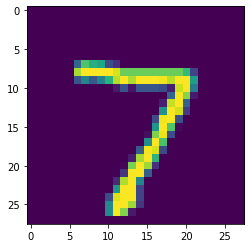

In [22]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [23]:
print(Y_test[0])

7


In [24]:
Y_pred = model.predict(X_test)

In [25]:
print(Y_pred.shape)

(10000, 10)


In [26]:
print(Y_pred[0])

[1.91826553e-06 9.20722902e-01 3.59806180e-01 9.68418479e-01
 1.01632544e-07 3.94223116e-06 1.34467022e-14 1.00000000e+00
 2.98929848e-07 3.87432873e-01]


model.predict() gives the prediction probability of each for that data point

In [28]:
# converting the predicition probabilites to class label

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image) 

7


In [29]:
# converting the predicition probabilites to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 1, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels 

Confusion Matrix

In [31]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [32]:
print(conf_mat)

tf.Tensor(
[[ 967    1    1    2    1    2    2    2    2    0]
 [   0 1121    0    2    0    3    2    1    6    0]
 [   4    5  982   10    3    2    2   12   11    1]
 [   0    0    2  986    0   12    0    4    2    4]
 [   0    1    3    0  965    0    6    2    1    4]
 [   2    0    0   25    1  857    4    0    2    1]
 [   3    1    2    3    6    5  934    1    3    0]
 [   1    5    7    9    2    0    0  990    2   12]
 [   3    1    1   14    6    7    8    2  929    3]
 [   1    4    0   12   21   11    1    7    5  947]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

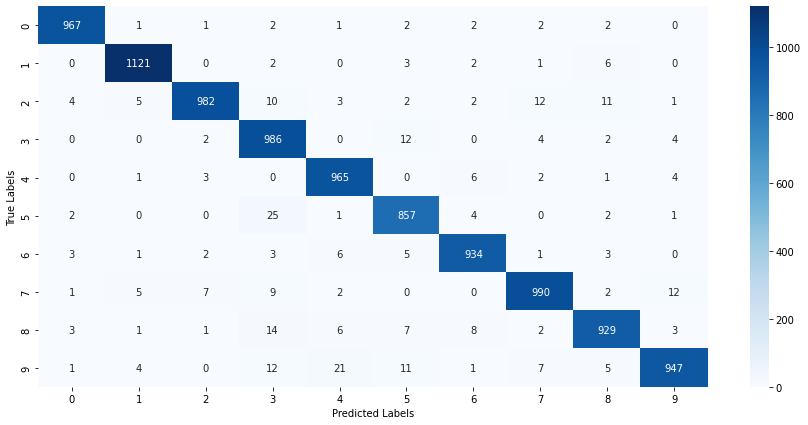

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [34]:
input_image_path = '/content/sample_image.webp'

input_image = cv2.imread(input_image_path)

In [35]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

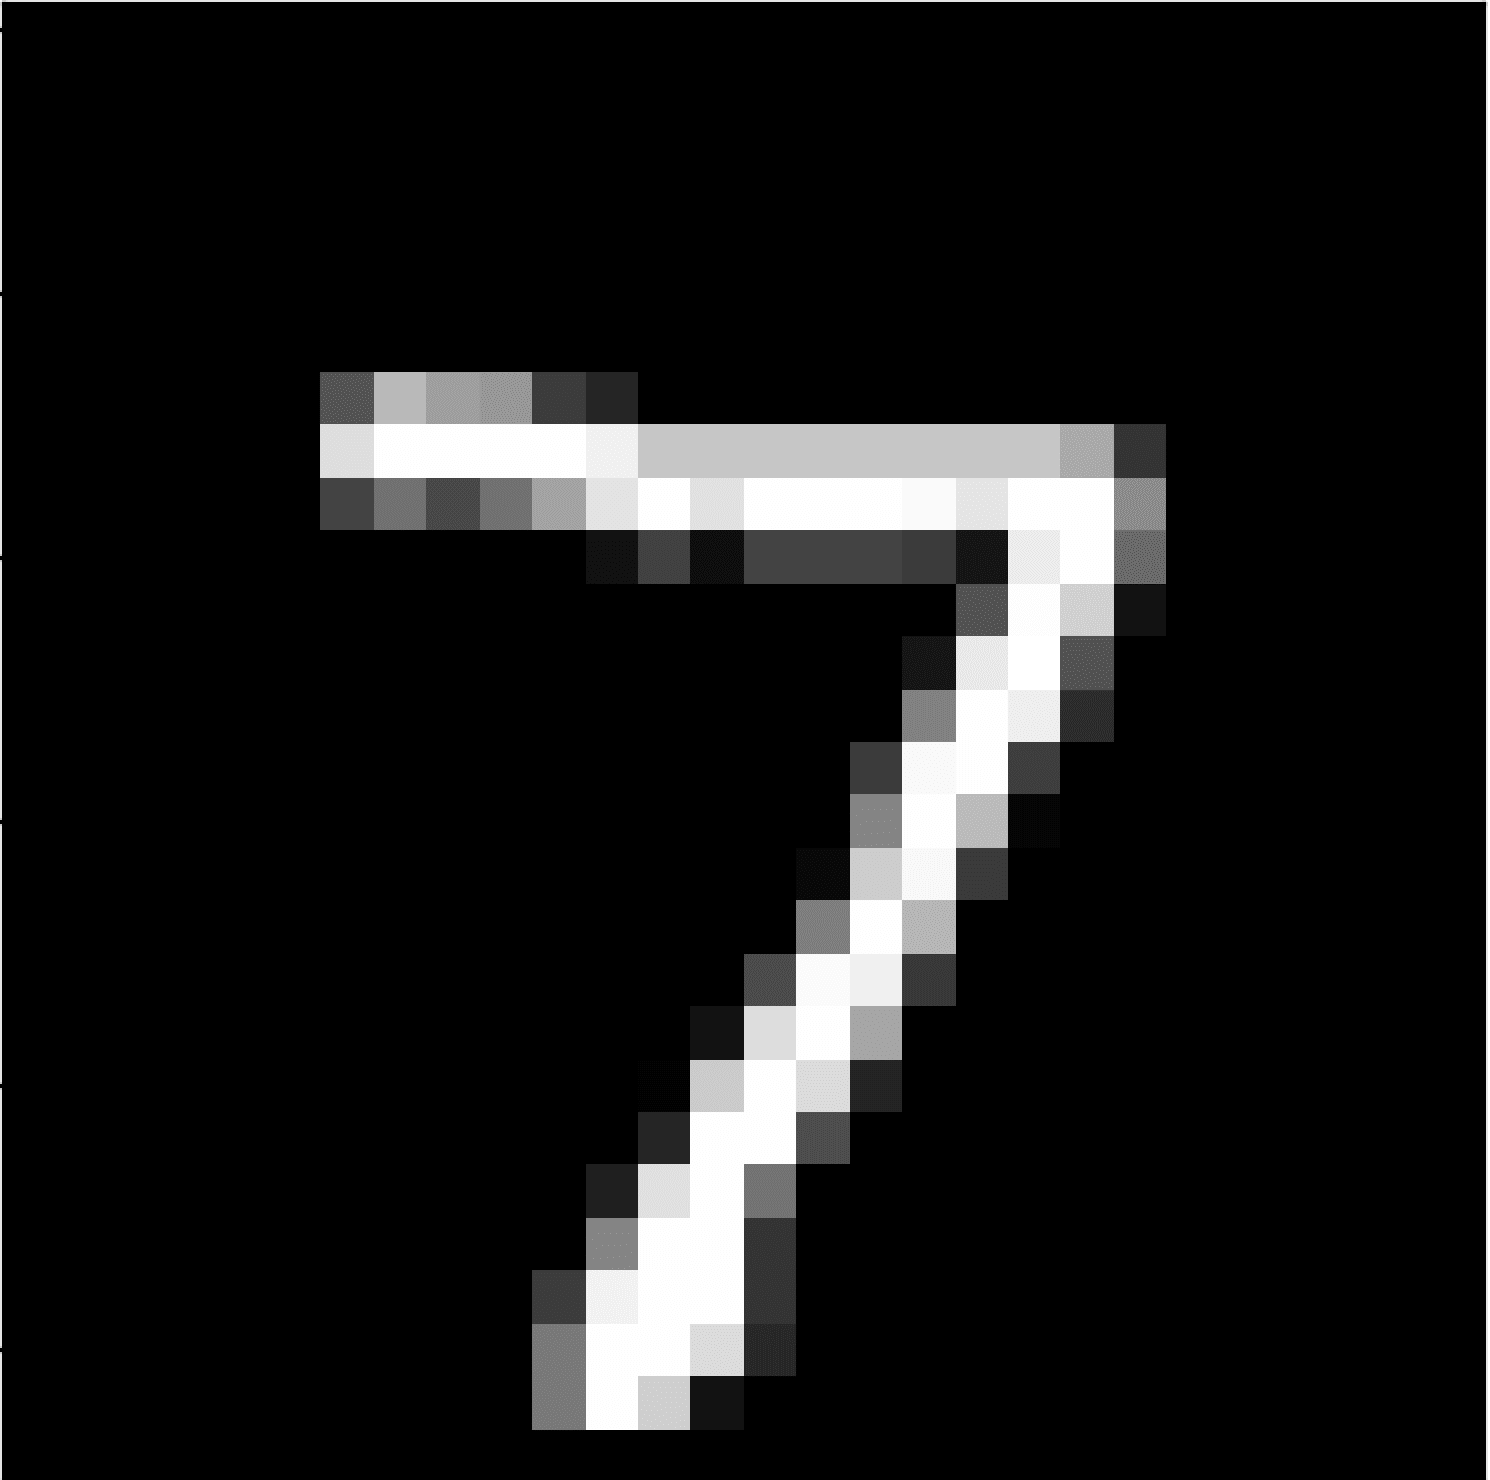

In [37]:
cv2_imshow(input_image)

In [38]:
input_image.shape

(1480, 1490, 3)

In [39]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [40]:
grayscale.shape

(1480, 1490)

In [41]:
input_image_resize = cv2.resize(grayscale, (28 , 28))

In [43]:
input_image_resize.shape

(28, 28)

In [44]:
cv2_imshow(input_image_resize)

In [45]:
input_image_resize = input_image_resize/255

In [46]:
type(input_image_resize)

numpy.ndarray

In [47]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [48]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

[[1.9002704e-06 9.1879874e-01 3.6361903e-01 9.6972501e-01 1.0159843e-07
  3.9307247e-06 1.4427829e-14 1.0000000e+00 3.0672436e-07 3.9432687e-01]]


In [49]:
input_pred_label = np.argmax(input_prediction)

In [50]:
print(input_pred_label)

7


**Predictive System**

Path of the image to be predicted: /content/sample_image.webp


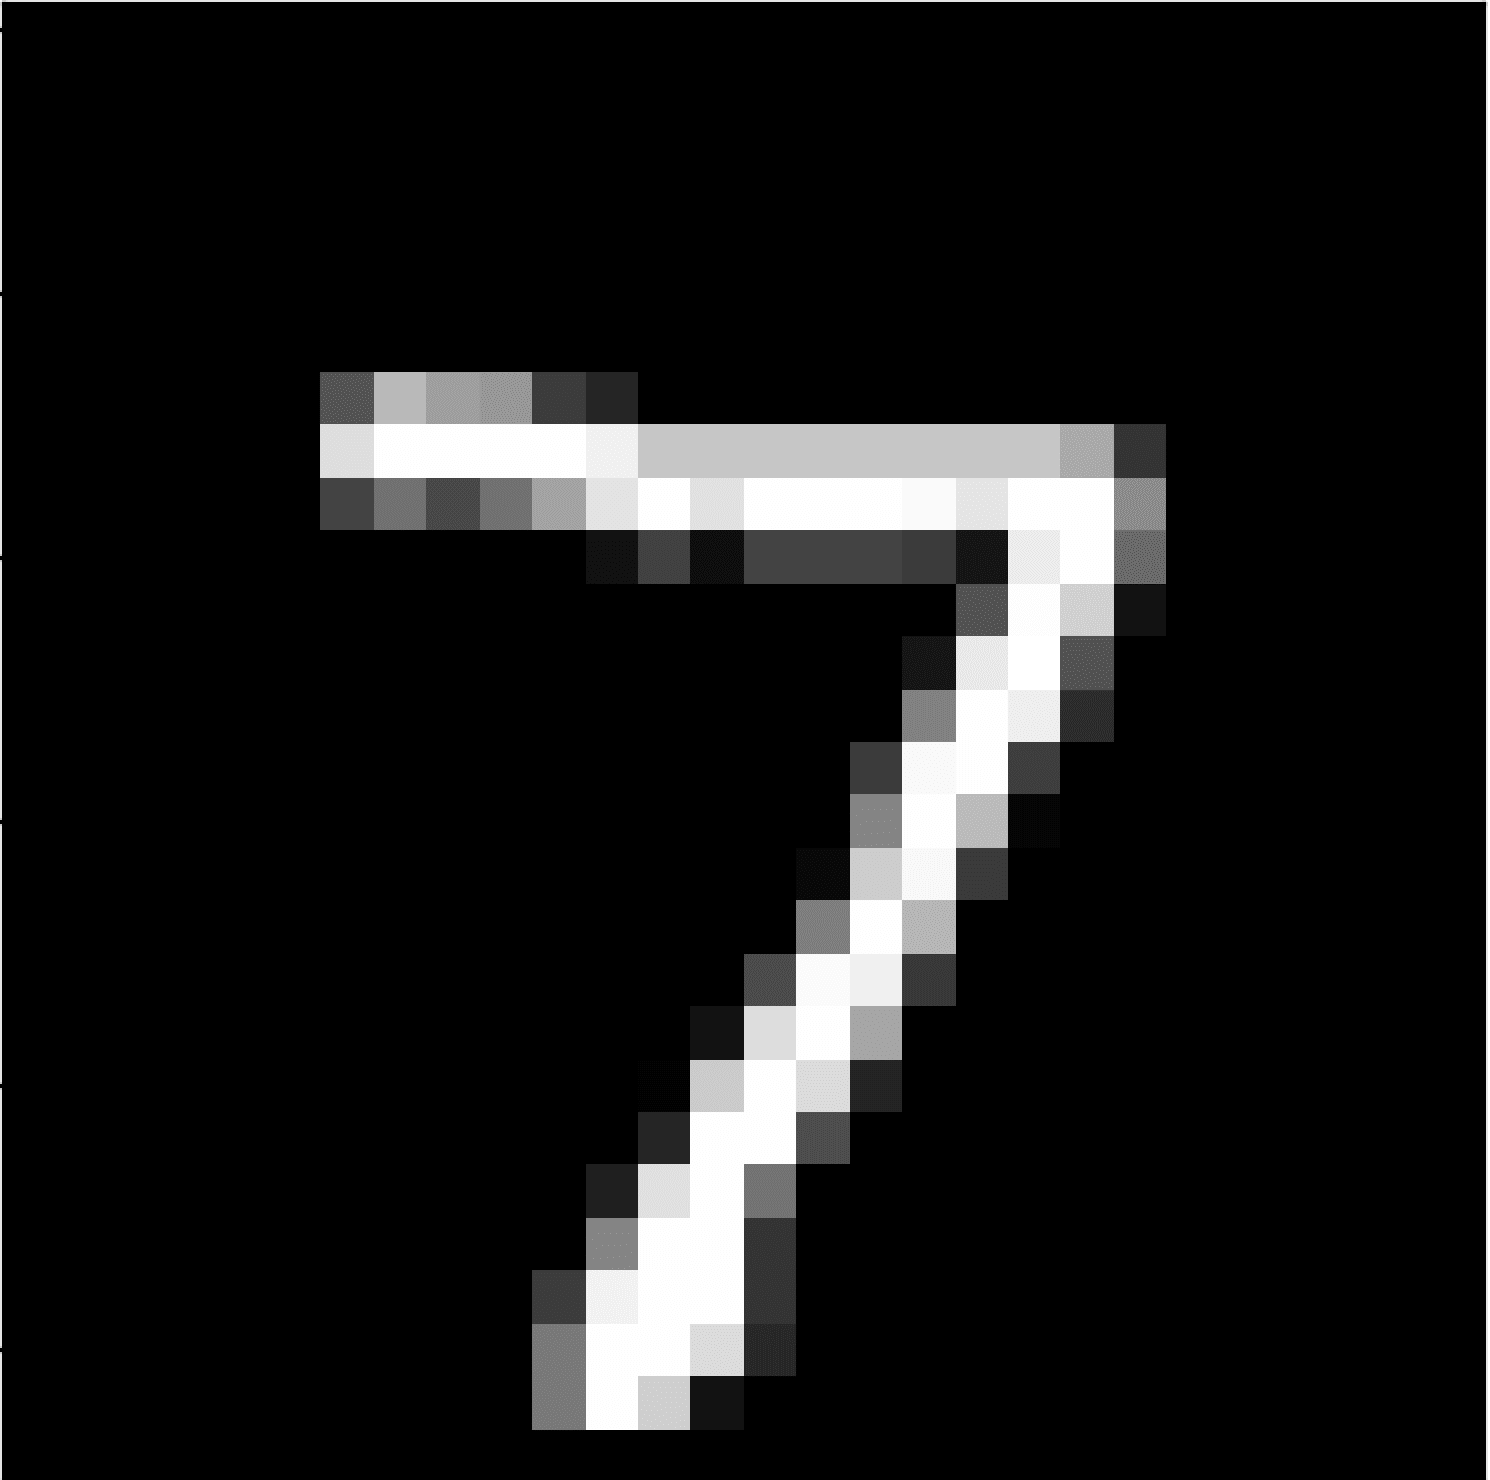

The Handwritten Digit is recognised as  7


In [51]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28 , 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)


